In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv('data/train.csv')

# 1. Exploratory Data Analysis (EDA)
print("Basic Dataset Information:")
print(data.info())

Basic Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-n

Basic Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallCond    1460 non-null   int64  
...
 80  SalePrice      1460 non-null   int64  
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB

In [3]:
# Visualize key statistics
print("\nStatistical Summary of Numerical Features:")
print(data.describe())



Statistical Summary of Numerical Features:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904

Statistical Summary of Numerical Features:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
...
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

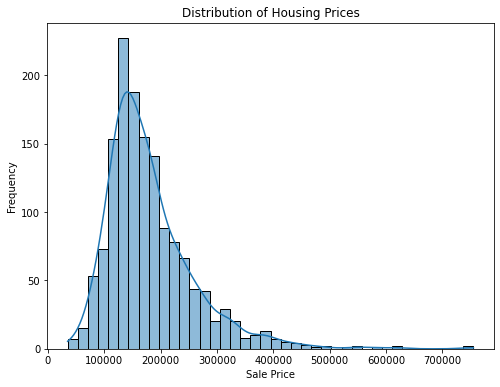

In [4]:
# Target variable: Visualize housing price distribution
target = 'SalePrice'  # Update this if your column has a different name
plt.figure(figsize=(8, 6))
sns.histplot(data[target], kde=True, bins=40)
plt.title('Distribution of Housing Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [5]:
# 2. Hypothesis Testing
# Example: Test if mean price is significantly different from a hypothetical price
hypothetical_mean = 180000
t_stat, p_value = stats.ttest_1samp(data[target].dropna(), hypothetical_mean)

print(f"\nT-Test for Hypothetical Mean (${hypothetical_mean}):")
print(f"T-Statistic = {t_stat:.3f}, P-Value = {p_value:.3f}")

if p_value < 0.05:
    print("We reject the null hypothesis: Prices significantly differ from the hypothetical mean.")
else:
    print("We fail to reject the null hypothesis.")


T-Test for Hypothetical Mean ($180000):
T-Statistic = 0.443, P-Value = 0.658
We fail to reject the null hypothesis.


T-Test for Hypothetical Mean ($180000):
T-Statistic = 0.443, P-Value = 0.658
We fail to reject the null hypothesis.

In [6]:
# 3. Building a Linear Regression Model
# Select a simple predictor for frequentist analysis (e.g., 'GrLivArea')
predictor = 'GrLivArea'
X = data[[predictor]].dropna()  # Independent variable
y = data[target].dropna()       # Dependent variable

# Ensure matching lengths after dropping NA values
X, y = X.align(y, axis=0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)

In [8]:
# 4. Model Performance and Diagnostics
print("\nLinear Regression Results:")
print(f"Coefficient for '{predictor}': {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")


Linear Regression Results:
Coefficient for 'GrLivArea': 102.49
Intercept: 24899.75


Linear Regression Results:
Coefficient for 'GrLivArea': 102.49
Intercept: 24899.75

In [9]:
# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 3418946311.18
R-squared: 0.55


Mean Squared Error: 3418946311.18
R-squared: 0.55

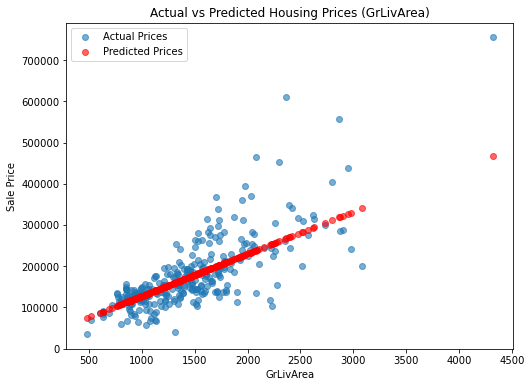

In [10]:
# Scatter plot of predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual Prices', alpha=0.6)
plt.scatter(X_test, y_pred, color='red', label='Predicted Prices', alpha=0.6)
plt.xlabel(predictor)
plt.ylabel('Sale Price')
plt.title(f'Actual vs Predicted Housing Prices ({predictor})')
plt.legend()
plt.show()


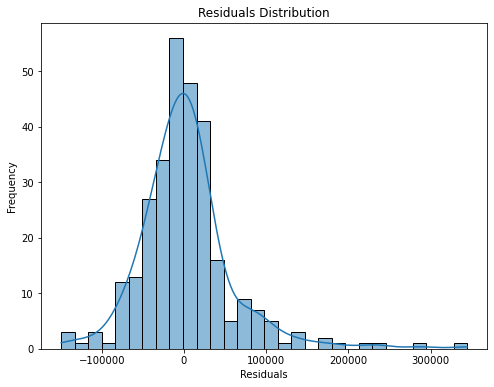

In [11]:
# Residual diagnostics: Check for normality
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Residual Normality Test
residual_stat, residual_p_value = stats.shapiro(residuals)
print(f"\nShapiro-Wilk Test for Residual Normality: P-Value = {residual_p_value:.3f}")
if residual_p_value < 0.05:
    print("Residuals are not normally distributed.")
else:
    print("Residuals are normally distributed.")


Shapiro-Wilk Test for Residual Normality: P-Value = 0.000
Residuals are not normally distributed.


Shapiro-Wilk Test for Residual Normality: P-Value = 0.000
Residuals are not normally distributed.

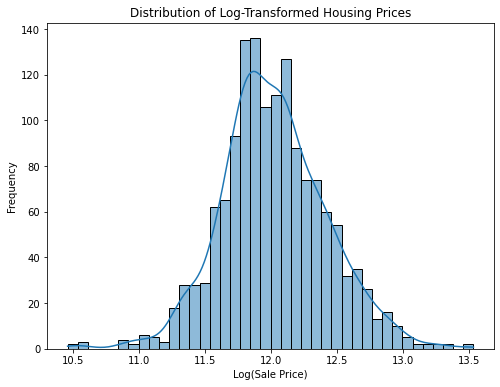


Linear Regression Results with Log-Transformed Target:
Coefficient for 'GrLivArea': 0.0005
Intercept: 11.2468
Mean Squared Error (Log Scale): 0.0858
R-squared: 0.5402


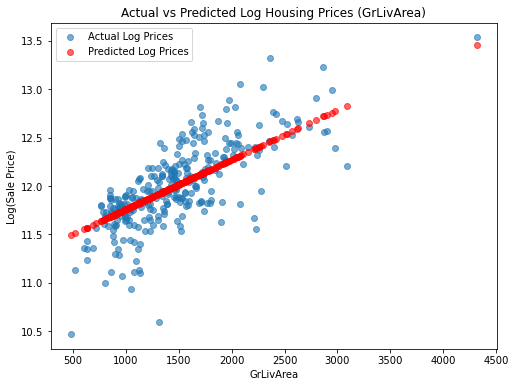

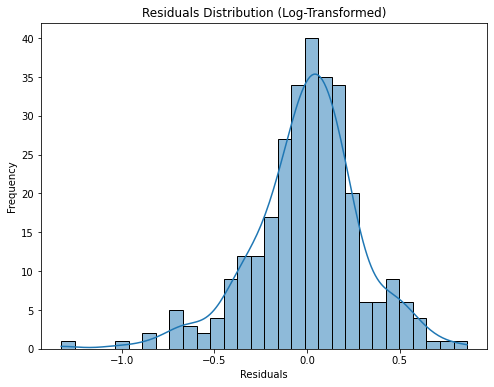


Shapiro-Wilk Test for Residual Normality: P-Value = 0.000
Residuals are not normally distributed.


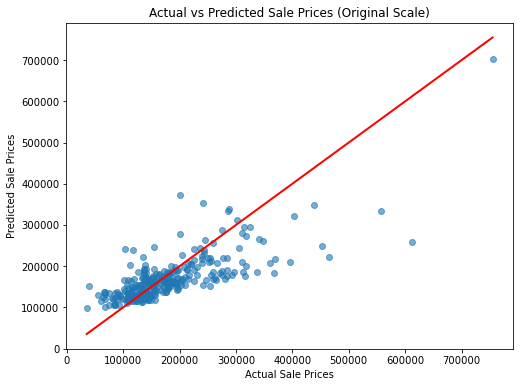


Model Diagnostics and Results Completed!


In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('data/train.csv')

# Log-transform SalePrice
target = 'SalePrice'  # Update if column name differs
data['Log_SalePrice'] = np.log1p(data[target])  # log(1 + SalePrice) to avoid log(0) issues

# 1. Visualize Log-Transformed Target
plt.figure(figsize=(8, 6))
sns.histplot(data['Log_SalePrice'], kde=True, bins=40)
plt.title('Distribution of Log-Transformed Housing Prices')
plt.xlabel('Log(Sale Price)')
plt.ylabel('Frequency')
plt.show()

# 2. Linear Regression with Log-Transformed Target
predictor = 'GrLivArea'  # Example predictor
X = data[[predictor]].dropna()  # Independent variable
y = data['Log_SalePrice'].dropna()  # Log-transformed dependent variable

# Ensure matching lengths after dropping NA values
X, y = X.align(y, axis=0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# 3. Model Performance and Diagnostics
print("\nLinear Regression Results with Log-Transformed Target:")
print(f"Coefficient for '{predictor}': {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Log Scale): {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# 4. Actual vs Predicted on Log Scale
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual Log Prices', alpha=0.6)
plt.scatter(X_test, y_pred, color='red', label='Predicted Log Prices', alpha=0.6)
plt.xlabel(predictor)
plt.ylabel('Log(Sale Price)')
plt.title(f'Actual vs Predicted Log Housing Prices ({predictor})')
plt.legend()
plt.show()

# 5. Residual Diagnostics
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals Distribution (Log-Transformed)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk Test for Residual Normality
residual_stat, residual_p_value = stats.shapiro(residuals)
print(f"\nShapiro-Wilk Test for Residual Normality: P-Value = {residual_p_value:.3f}")
if residual_p_value < 0.05:
    print("Residuals are not normally distributed.")
else:
    print("Residuals are normally distributed.")

# Back-Transform Predictions to Original Scale
y_pred_original_scale = np.expm1(y_pred)  # Apply exp to revert log transformation
y_test_original_scale = np.expm1(y_test)

# 6. Compare Back-Transformed Predictions with Actual Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original_scale, y_pred_original_scale, alpha=0.6)
plt.plot([y_test_original_scale.min(), y_test_original_scale.max()],
         [y_test_original_scale.min(), y_test_original_scale.max()],
         color='red', lw=2)  # 45-degree line
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Actual vs Predicted Sale Prices (Original Scale)')
plt.show()

print("\nModel Diagnostics and Results Completed!")


Linear Regression Results with Log-Transformed Target:
Coefficient for 'GrLivArea': 0.0005
Intercept: 11.2468
Mean Squared Error (Log Scale): 0.0858
R-squared: 0.5402

Shapiro-Wilk Test for Residual Normality: P-Value = 0.000
Residuals are not normally distributed.

Model Diagnostics and Results Completed!

<h3>2. Decision Tree Regression

In [16]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predict on test data
y_pred_tree = tree_model.predict(X_test)

# Evaluate performance
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\nDecision Tree Regression Results:")
print(f"Mean Squared Error: {mse_tree:.4f}")
print(f"R-squared: {r2_tree:.4f}")



Decision Tree Regression Results:
Mean Squared Error: 0.0883
R-squared: 0.5270


Decision Tree Regression Results:
Mean Squared Error: 0.0883
R-squared: 0.5270

<h3>3. Random Forest Regression

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression Results:")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"R-squared: {r2_rf:.4f}")



Random Forest Regression Results:
Mean Squared Error: 0.0887
R-squared: 0.5245


Random Forest Regression Results:
Mean Squared Error: 0.0887
R-squared: 0.5245

<h3>4.Ridge Regression 



Ridge Regression Results:
Best Alpha: 10
Mean Squared Error (Log Scale): 0.0307
R-squared: 0.8355


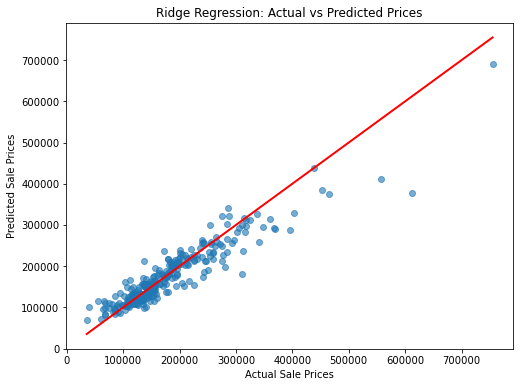

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Log-transform target
data['Log_SalePrice'] = np.log1p(data['SalePrice'])

# Define predictor and target
predictors = ['GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF']  # Example features
X = data[predictors].dropna()
y = data['Log_SalePrice'].dropna()

# Ensure matching lengths
X, y = X.align(y, axis=0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Ridge Regression using GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Regularization strengths
ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best Ridge model
best_ridge = grid_search.best_estimator_

# Predict on test set
y_pred_ridge = best_ridge.predict(X_test)

# Evaluate performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Results:")
print(f"Best Alpha: {grid_search.best_params_['alpha']}")
print(f"Mean Squared Error (Log Scale): {mse_ridge:.4f}")
print(f"R-squared: {r2_ridge:.4f}")

# Back-transform predictions
y_pred_ridge_original = np.expm1(y_pred_ridge)
y_test_original = np.expm1(y_test)

# Compare predictions with actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_ridge_original, alpha=0.6)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         color='red', lw=2)
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Ridge Regression: Actual vs Predicted Prices')
plt.show()


Ridge Regression Results:
Best Alpha: 10
Mean Squared Error (Log Scale): 0.0307
R-squared: 0.8355

<h3>4.5 With Lasso


Lasso Regression Results:
Best Alpha: 0.001
Mean Squared Error (Log Scale): 0.0307
R-squared: 0.8355


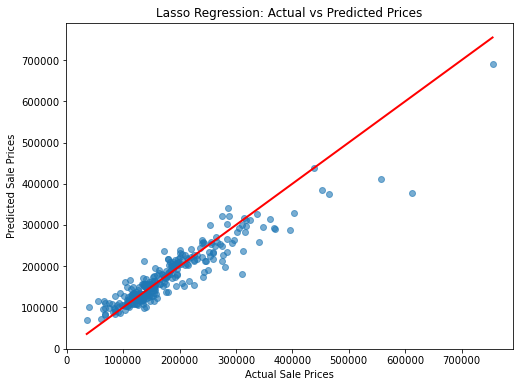


Lasso Coefficients:
GrLivArea      0.000269
OverallQual    0.110932
YearBuilt      0.003135
TotalBsmtSF    0.000117
dtype: float64


In [26]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Log-transform target
data['Log_SalePrice'] = np.log1p(data['SalePrice'])

# Define predictors and target
predictors = ['GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF']  # Example predictors
X = data[predictors].dropna()
y = data['Log_SalePrice'].dropna()

# Align data to avoid mismatches
X, y = X.align(y, axis=0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Lasso Regression using GridSearchCV
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}  # Regularization strengths
lasso_model = Lasso(max_iter=10000)  # Increase iterations for convergence
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best Lasso model
best_lasso = grid_search.best_estimator_

# Predict on test set
y_pred_lasso = best_lasso.predict(X_test)

# Evaluate performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression Results:")
print(f"Best Alpha: {grid_search.best_params_['alpha']}")
print(f"Mean Squared Error (Log Scale): {mse_lasso:.4f}")
print(f"R-squared: {r2_lasso:.4f}")

# Back-transform predictions
y_pred_lasso_original = np.expm1(y_pred_lasso)
y_test_original = np.expm1(y_test)

# Compare predictions with actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_lasso_original, alpha=0.6)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         color='red', lw=2)
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Lasso Regression: Actual vs Predicted Prices')
plt.show()

# Print non-zero coefficients
lasso_coefficients = pd.Series(best_lasso.coef_, index=predictors)
print("\nLasso Coefficients:")
print(lasso_coefficients[lasso_coefficients != 0])  # Only non-zero coefficients


Lasso Coefficients:
GrLivArea      0.000269
OverallQual    0.110932
YearBuilt      0.003135
TotalBsmtSF    0.000117
dtype: float64

<h3>Returning the RSME of the un-logged

In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Back-transform predictions and actual values
y_pred_lasso_original = np.expm1(y_pred_lasso)
y_test_original = np.expm1(y_test)

# Calculate RMSE on the original scale
rmse_original = np.sqrt(mean_squared_error(y_test_original, y_pred_lasso_original))

print(f"Root Mean Squared Error (Original Scale): {rmse_original:.4f}")


Root Mean Squared Error (Original Scale): 32620.4262


Root Mean Squared Error (Original Scale): 32620.4262

Is this good?

In [24]:
avg_sale_price = data['SalePrice'].mean()
relative_error = (rmse_original / avg_sale_price) * 100
print(f"Relative Error: {relative_error:.2f}%")


Relative Error: 18.03%


Root Mean Squared Error (Original Scale): 32620.4262

<h3>1. Bootstrapping Coefficients

In [20]:
from sklearn.utils import resample
from sklearn.linear_model import Lasso

# Set up variables
n_bootstraps = 1000
alpha = 0.05  # Confidence level = 95% (2.5% on each tail)
coefficients_bootstrap = []

# Bootstrapping
for i in range(n_bootstraps):
    # Resample the training data with replacement
    X_boot, y_boot = resample(X_train, y_train, random_state=i)
    
    # Train Lasso model on bootstrap sample
    lasso_model_boot = Lasso(alpha=grid_search.best_params_['alpha'], max_iter=10000)
    lasso_model_boot.fit(X_boot, y_boot)
    
    # Store coefficients
    coefficients_bootstrap.append(lasso_model_boot.coef_)

# Convert to DataFrame for easier analysis
coefficients_bootstrap = pd.DataFrame(coefficients_bootstrap, columns=predictors)

# Calculate confidence intervals
lower_bounds = coefficients_bootstrap.quantile(alpha / 2)
upper_bounds = coefficients_bootstrap.quantile(1 - alpha / 2)

print("Bootstrapped Confidence Intervals for Lasso Coefficients:")
for feature in predictors:
    print(f"{feature}: [{lower_bounds[feature]:.6f}, {upper_bounds[feature]:.6f}]")


Bootstrapped Confidence Intervals for Lasso Coefficients:
GrLivArea: [0.000216, 0.000331]
OverallQual: [0.088705, 0.131872]
YearBuilt: [0.002720, 0.003594]
TotalBsmtSF: [0.000016, 0.000212]


Bootstrapped Confidence Intervals for Lasso Coefficients:
GrLivArea: [0.000216, 0.000331]
OverallQual: [0.088705, 0.131872]
YearBuilt: [0.002720, 0.003594]
TotalBsmtSF: [0.000016, 0.000212]

In [22]:
r2_scores = []
mse_scores = []

# Bootstrapping metrics
for i in range(n_bootstraps):
    X_boot, y_boot = resample(X_train, y_train, random_state=i)
    lasso_model_boot = Lasso(alpha=grid_search.best_params_['alpha'], max_iter=10000)
    lasso_model_boot.fit(X_boot, y_boot)
    y_pred_boot = lasso_model_boot.predict(X_test)
    
    r2_scores.append(r2_score(y_test, y_pred_boot))
    mse_scores.append(mean_squared_error(y_test, y_pred_boot))

# Calculate confidence intervals
r2_lower, r2_upper = np.percentile(r2_scores, [2.5, 97.5])
mse_lower, mse_upper = np.percentile(mse_scores, [2.5, 97.5])

print(f"95% CI for R-squared: [{r2_lower:.4f}, {r2_upper:.4f}]")
print(f"95% CI for MSE: [{mse_lower:.4f}, {mse_upper:.4f}]")


95% CI for R-squared: [0.8052, 0.8448]
95% CI for MSE: [0.0290, 0.0364]


95% CI for R-squared: [0.8052, 0.8448]
95% CI for MSE: [0.0290, 0.0364]

<h3>GPT-Optimized

Best Alpha: 0.0021209508879201904
RMSE (Log Scale): 0.1698
RMSE (Original Scale): 31813.14


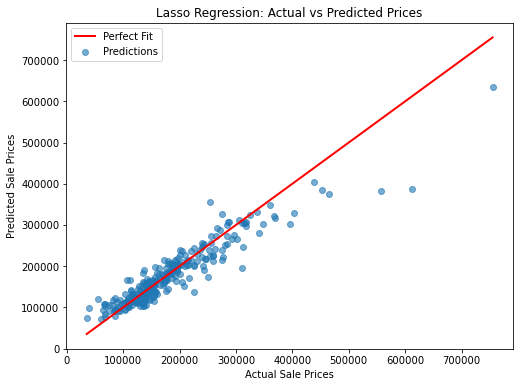

Mean CV RMSE (Log Scale): 0.1693


In [25]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Include More Predictors
# Add relevant features from your dataset
predictors = [
    'GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GarageArea', 
    'LotArea', 'FullBath', 'HalfBath', 'Fireplaces'
]
X = data[predictors].dropna()
y = data['Log_SalePrice'].dropna()

# Align data
X, y = X.align(y, axis=0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Hyperparameter Tuning with Cross-Validation
param_grid = {'alpha': np.logspace(-4, 1, 50)}  # Finer range of alpha values
lasso_model = Lasso(max_iter=10000)
grid_search = GridSearchCV(lasso_model, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_lasso = grid_search.best_estimator_

# Step 3: Model Performance
# Predict on test set
y_pred_lasso = best_lasso.predict(X_test)

# Evaluate RMSE on log scale
mse_lasso_log = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso_log = np.sqrt(mse_lasso_log)
print(f"Best Alpha: {grid_search.best_params_['alpha']}")
print(f"RMSE (Log Scale): {rmse_lasso_log:.4f}")

# Back-transform predictions
y_pred_lasso_original = np.expm1(y_pred_lasso)
y_test_original = np.expm1(y_test)

# Calculate RMSE on original scale
rmse_lasso_original = np.sqrt(mean_squared_error(y_test_original, y_pred_lasso_original))
print(f"RMSE (Original Scale): {rmse_lasso_original:.2f}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_lasso_original, alpha=0.6, label='Predictions')
plt.plot([y_test_original.min(), y_test_original.max()], 
         [y_test_original.min(), y_test_original.max()], color='red', lw=2, label='Perfect Fit')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Lasso Regression: Actual vs Predicted Prices')
plt.legend()
plt.show()

# Step 4: Cross-Validation Performance
cv_scores = cross_val_score(best_lasso, X, y, cv=10, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"Mean CV RMSE (Log Scale): {cv_rmse.mean():.4f}")


Best Alpha: 0.0021209508879201904
RMSE (Log Scale): 0.1698
RMSE (Original Scale): 31813.14

Mean CV RMSE (Log Scale): 0.1693